In [51]:
from scipy.stats import beta, bernoulli, dirichlet, multinomial, gamma, poisson
import matplotlib.pyplot as plt
import numpy as np

- Beta-Bernoulli
- Beta-Binomial
- Dirichlet-Multinomial
- Dirichlet-Categorical
- Gamma-Poisson

# Beta-Bernoulli

$x \sim \mathcal{Ber}(x;\theta)$

$p(x) = \theta^{x}(1-\theta)^{(1-x)}$

$E[x] = \theta$, Var($x$) = $\theta (1-\theta)$

Given $D=(x_{1}, x_{2}, ..., x_{N})$

Likelihood is $p(D|\theta) = \prod\limits_{n} p(x_{n}|\theta) = \prod\limits_{n}\theta^{x_{n}}(1-\theta)^{x_{n}} = \theta^{N_{1}}(1-\theta)^{N_{0}}$ where $x_{n} \in {{0,1}}$, $N_{1} = \sum\limits_{n}x_{n}$, $N_{0} = \sum\limits_{n}1-x_{n}$

### Maximum Likelihood Parameter Estimation

$L(\theta) = \log p(D|\theta) = N_{1}\log\theta + N_{0}\log(1-\theta)$

$\frac{dL}{d\theta} = 0 => \theta_{ML} = \frac{N_{1}}{N}$

### Bayesian Parameter Estimation

$p(\theta|D) = \frac{p(D|\theta)p(\theta)}{p(D)}$

$\theta \sim \mathcal{Beta}(\theta;\alpha_{1},\alpha_{0}) \propto \theta^{(\alpha_{1}-1)} (1-\theta)^{(\alpha_{0}-1)}$

$E[\theta] = \frac{\alpha_{1}}{\alpha_{0}+\alpha{1}}$, Mode$(\theta) = \frac{\alpha_{1}-1}{\alpha_{0}+\alpha{1}-2}$

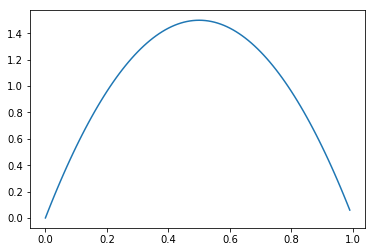

In [4]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
a1 =  2
a0 = 2
x = np.arange (0.0, 1, 0.01)
y = beta.pdf(x,a1,a0)
plt.plot(x,y)

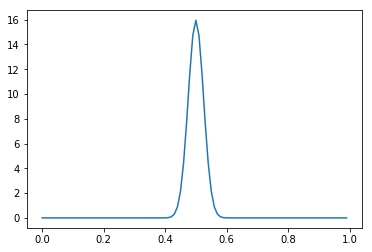

In [5]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
a1 =  200
a0 = 200
x = np.arange (0.0, 1, 0.01)
y = beta.pdf(x,a1,a0)
plt.plot(x,y)

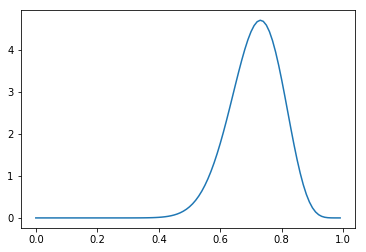

In [7]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
a1 =  20
a0 = 8
x = np.arange (0.0, 1, 0.01)
y = beta.pdf(x,a1,a0)
plt.plot(x,y)

$p(\theta|D) \propto p(D|\theta)p(\theta) \propto \theta^{N_{1}}(1-\theta)^{N_{0}} \theta^{(\alpha_{1}-1)} (1-\theta)^{(\alpha_{0}-1)} = \theta^{(N_{1}+\alpha_{1}-1)} (1-\theta)^{(N_{0}+\alpha_{0}-1)}$

$p(\theta|D) \propto \mathcal{Beta}(N_{1}+\alpha_{1},N_{0}+\alpha_{0})$

1
1
###############
14
6
###############
68
32


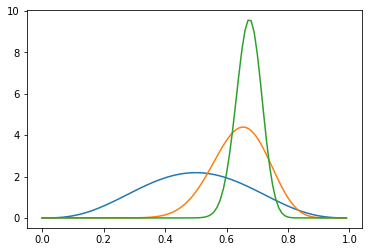

In [24]:
# Generative Process
#prior beliefs
a1 = 3
a0 = 3
r = bernoulli.rvs(0.7,size=2)
N1 = sum(r)
N0 = 2 - N1
print N1
print N0
a1_new = a1+N1
a0_new = a0+N0
x = np.arange (0.0, 1, 0.01)
y = beta.pdf(x,a1_new,a0_new)
plt.plot(x,y)
print '###############'
r = bernoulli.rvs(0.7,size=20)
N1 = sum(r)
N0 = 20 - N1
print N1
print N0
a1_new = a1_new+N1
a0_new = a0_new+N0
x = np.arange (0.0, 1, 0.01)
y = beta.pdf(x,a1_new,a0_new)
plt.plot(x,y)
print '###############'
r = bernoulli.rvs(0.7,size=100)
N1 = sum(r)
N0 = 100 - N1
print N1
print N0
a1_new = a1_new+N1
a0_new = a0_new+N0
x = np.arange (0.0, 1, 0.01)
y = beta.pdf(x,a1_new,a0_new)
plt.plot(x,y)

# Beta-Binomial

$x \in 0,1,...N$

$x \sim \mathcal{Bi}(x;N,\theta) = {N\choose x}\theta^{x}(1-\theta)^{N-x}$

$p(\theta|D) \propto \theta^{(x+\alpha_{1}-1)} (1-\theta)^{(N-x+\alpha_{0}-1)} = \mathcal{Beta}(x+\alpha_{1},N-x+\alpha_{0})$

# Dirichlet-Categorical

$x \sim \mathcal{Cat}(x;\theta) = \theta_{k} = \theta_{1}^{I(x=1)}\theta_{2}^{I(x=2)}...\theta_{K}^{I(x=K)}$ where $\sum\limits_{k}\theta_{k}=1$

$l(\theta) = \log p(D|\theta) = \log \prod \limits_{m}p(x_{m}|\theta) = \sum\limits_{m,k}I(x_{m}=k)\log\theta_{k} = \sum\limits_{k}N_{k}\log\theta_{k} $

### Maximum Likelihood Parameter Estimation

Introduce constrained lost function

$\hat{l(\theta)} = \sum\limits_{k}N_{k}\log\theta_{k} + \lambda\left(1-\sum\limits_{k}\theta_{k}\right)$

$\frac{d\hat{l}}{d\theta_{k}} = 0 => \theta_{k}=\frac{N_{k}}{N}$

### Bayesian Parameter Estimation

$p(\theta|D) \propto p(\theta)p(D|\theta)$

$p(\theta) = \mathcal{Dir}(\theta;\alpha)$ where $\alpha = (\alpha_{1},\alpha_{2},...,\alpha_{K}) \propto \theta_{1}^{(\alpha_{1}-1)}\theta_{2}^{(\alpha_{2}-1)}...\theta_{K}^{(\alpha_{K}-1)}$

$E[\theta_{k}] = \frac{\alpha_{k}}{\alpha}, Mode(\theta_{k})\frac{\alpha_{k}-1}{\alpha-K}$ where $\alpha=\sum\limits_{i}\alpha_{i}$

Dirichlet visualization: http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/

In [29]:
import matplotlib.tri as tri

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

# Mid-points of triangle sides opposite of each corner
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]

class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])
    
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

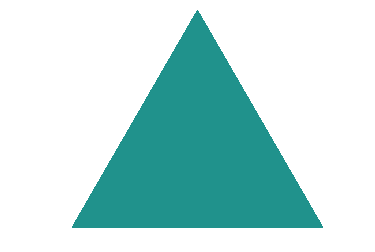

In [30]:
draw_pdf_contours(Dirichlet([1, 1, 1]))

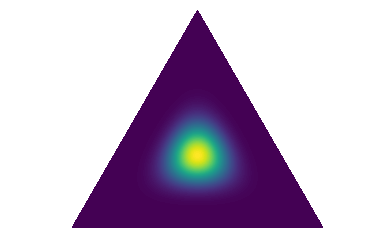

In [31]:
draw_pdf_contours(Dirichlet([10, 10, 10]))

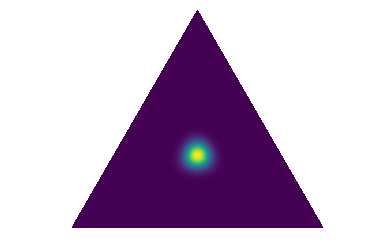

In [33]:
draw_pdf_contours(Dirichlet([50, 50, 50]))

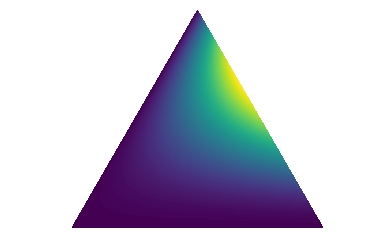

In [40]:
draw_pdf_contours(Dirichlet([1, 2, 3]))

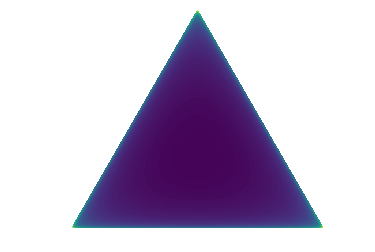

In [39]:
draw_pdf_contours(Dirichlet([0.9, 0.9, 0.9]))

$p(\theta|D) \propto p(D|\theta)p(\theta) \propto \theta_{1}^{(N_{1}+\alpha_{1}-1)}\theta_{2}^{(N_{2}+\alpha_{2}-1)}...\theta_{K}^{(N_{K}+\alpha_{K}-1)} = \mathcal{Dir}(\theta;\alpha_{1}+N_{1},\alpha_{2}+N_{2},...,\alpha_{K}+N_{K})$

In [44]:
rv = multinomial.rvs(8, [0.3, 0.2, 0.5])
print rv
rv = dirichlet.rvs([3, 2, 5],size=10)
print rv

[4 3 1]
[[ 0.376048    0.10004345  0.52390855]
 [ 0.42010406  0.16706758  0.41282836]
 [ 0.04538764  0.16038356  0.7942288 ]
 [ 0.32441644  0.13703014  0.53855342]
 [ 0.30545841  0.22400021  0.47054138]
 [ 0.47190624  0.33926738  0.18882638]
 [ 0.31607399  0.12024989  0.56367612]
 [ 0.1078323   0.12646501  0.76570269]
 [ 0.2562824   0.15188491  0.59183268]
 [ 0.07180377  0.30691878  0.62127745]]


3
0
2


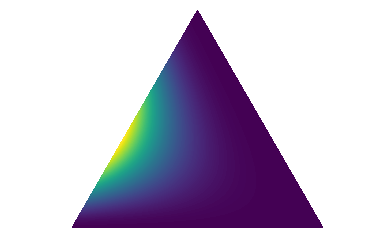

In [46]:
# Generative Process
#prior beliefs
a1 = 1
a2 = 1
a3 = 1
r = multinomial.rvs(5, [0.3, 0.2, 0.5])
N1 = r[0]
N2 = r[1]
N3 = r[2]
print N1
print N2
print N3
a1_new = a1+N1
a2_new = a2+N2
a3_new = a3+N3
draw_pdf_contours(Dirichlet([a1_new, a2_new, a3_new]))

3
4
3


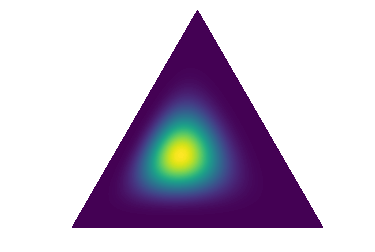

In [47]:
r = multinomial.rvs(10, [0.3, 0.2, 0.5])
N1 = r[0]
N2 = r[1]
N3 = r[2]
print N1
print N2
print N3
a1_new = a1_new+N1
a2_new = a2_new+N2
a3_new = a3_new+N3
draw_pdf_contours(Dirichlet([a1_new, a2_new, a3_new]))

4
1
5


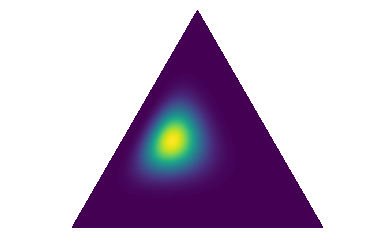

In [48]:
r = multinomial.rvs(10, [0.3, 0.2, 0.5])
N1 = r[0]
N2 = r[1]
N3 = r[2]
print N1
print N2
print N3
a1_new = a1_new+N1
a2_new = a2_new+N2
a3_new = a3_new+N3
draw_pdf_contours(Dirichlet([a1_new, a2_new, a3_new]))

0
0
10


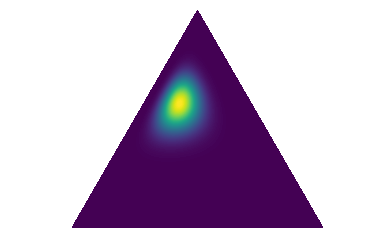

In [49]:
r = multinomial.rvs(10, [0.3, 0.2, 0.5])
N1 = r[0]
N2 = r[1]
N3 = r[2]
print N1
print N2
print N3
a1_new = a1_new+N1
a2_new = a2_new+N2
a3_new = a3_new+N3
draw_pdf_contours(Dirichlet([a1_new, a2_new, a3_new]))

3
2
5


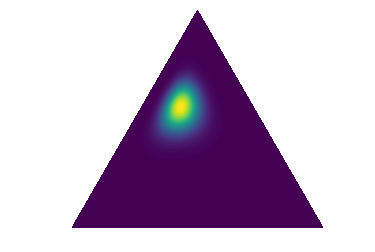

In [50]:
r = multinomial.rvs(10, [0.3, 0.2, 0.5])
N1 = r[0]
N2 = r[1]
N3 = r[2]
print N1
print N2
print N3
a1_new = a1_new+N1
a2_new = a2_new+N2
a3_new = a3_new+N3
draw_pdf_contours(Dirichlet([a1_new, a2_new, a3_new]))

# Gamma-Poisson

$x \sim \mathcal{PO}(x;\lambda) = \frac{\lambda^{x}exp(-\lambda)}{x!}$

$\lambda \sim \mathcal{G}(\lambda;\alpha,\beta) \propto \lambda^{(\alpha-1)} exp(-\beta\lambda)$ with shape $\alpha$, mean $\frac{\alpha}{\beta}$ and variance $\frac{\alpha}{\beta^2}$

$p(\lambda|D) \propto \lambda^{\alpha+\sum\limits_{m}x_{m}-1} exp(-(\beta + N)\lambda) \propto \mathcal{G}(\lambda;\alpha+\sum\limits_{m}x_{m},\beta + N)$ for $N$ observations

The first parameter of Gamma distribution is the summation of observations and the second parameter is the number of observations with additional prior beliefs.

In [58]:
a = 6.
b = 4.
s = gamma.rvs(a,scale=1/b,size=10)
print s

[ 0.66042089  1.06141644  1.93665673  1.09823273  0.68416466  0.8346528
  1.33944873  2.09116598  1.7884686   1.58811323]


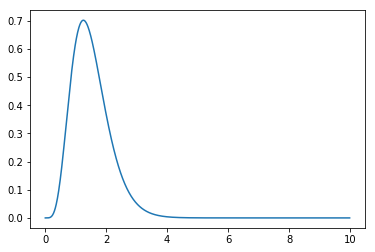

In [61]:
a = 6.
b = 4.
x = np.arange (0.0, 10, 0.01)
y = gamma.pdf(x,a,scale=1/b)
plt.plot(x,y)

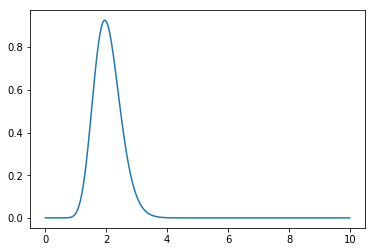

In [63]:
a = 21.7
b = 10.6
x = np.arange (0.0, 10, 0.01)
y = gamma.pdf(x,a,scale=1/b)
plt.plot(x,y)

In [64]:
r = poisson.rvs(7.6,size=2)
print r

[9 3]


[11 10]
###############
[10  9 10  7 10 13 10  5  7  6]
###############
[ 8 10  3  4  8  8 10  5 11  6]


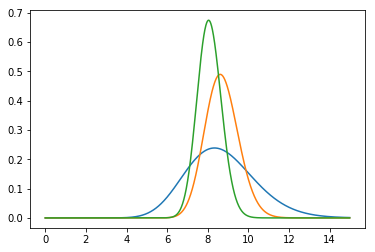

In [66]:
# Generative Process
#prior beliefs
a = 5.
b = 1.
r = poisson.rvs(7.6,size=2)
print r
a_new = a + sum(r)
b_new = b + 2
x = np.arange (0.0, 15, 0.01)
y = gamma.pdf(x,a_new,scale=1/b_new)
plt.plot(x,y)
print '###############'
r = poisson.rvs(7.6,size=10)
print r
a_new = a_new + sum(r)
b_new = b_new + 10
x = np.arange (0.0, 15, 0.01)
y = gamma.pdf(x,a_new,scale=1/b_new)
plt.plot(x,y)
print '###############'
r = poisson.rvs(7.6,size=10)
print r
a_new = a_new + sum(r)
b_new = b_new + 10
x = np.arange (0.0, 15, 0.01)
y = gamma.pdf(x,a_new,scale=1/b_new)
plt.plot(x,y)